In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


In [4]:
from google.colab import files
uploaded = files.upload()

Saving car_age_price.csv to car_age_price.csv


In [5]:
df = pd.read_csv('car_age_price.csv')

In [6]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


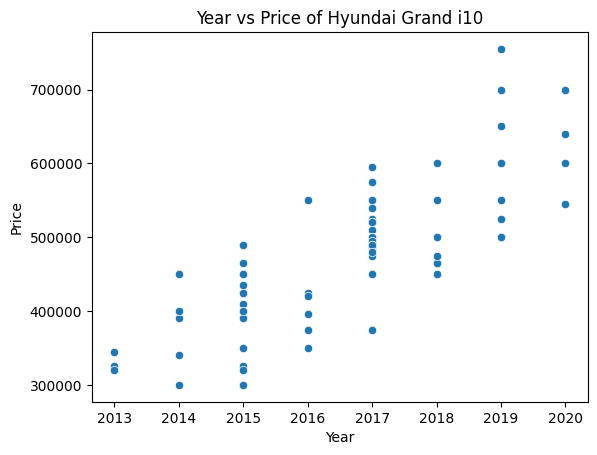

In [7]:
sns.scatterplot(data=df, x='Year', y='Price')
plt.title("Year vs Price of Hyundai Grand i10")
plt.show()

In [10]:
x = df[['Year']]
y = df[['Price']]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
lr_preds = lr_model.predict(X_test)
mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(mse)
lr_r2 = r2_score(y_test, lr_preds)

In [19]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [21]:
lasso_preds = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_preds)

In [22]:
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R²:", lr_r2)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R²:", lasso_r2)

Linear Regression RMSE: 65779.22359552195
Linear Regression R²: 0.36759313425902185
Lasso Regression RMSE: 65778.8702473345
Lasso Regression R²: 0.3675999284778446


In [23]:
year_2022 = pd.DataFrame({'Year': [2022]})
lr_price_2022 = lr_model.predict(year_2022)[0]
lasso_price_2022 = lasso_model.predict(year_2022)[0]


In [26]:
lr_price_2022 = lr_model.predict(year_2022)[0].item()
lasso_price_2022 = lasso_model.predict(year_2022)[0].item()
print(f"\nPredicted price for 2022 model using Linear Regression: ₹{lr_price_2022:.2f}")
print(f"Predicted price for 2022 model using Lasso Regression: ₹{lasso_price_2022:.2f}")



Predicted price for 2022 model using Linear Regression: ₹743601.62
Predicted price for 2022 model using Lasso Regression: ₹743599.37


In [27]:
better_model = "Linear Regression" if lr_rmse < lasso_rmse else "Lasso Regression"
print(f"\nBetter performing model: {better_model}")


Better performing model: Lasso Regression
